# DBSCAN

In [46]:
%matplotlib inline

import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import rcParams
rcParams['figure.figsize'] = 11.7,8.27
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.cm as cm

from sklearn import neighbors

In [47]:
#Prepocessing per clustering: scaling, normalization
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler #ultimo per otuliers: mantiene outliers considerando il range interquartile

#kmeans, dbscan, hierarchical (sklearn)
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
#evaluation
from sklearn.metrics import silhouette_score

#distance matrix (dbscan elbow, hierarchical)
from scipy.spatial.distance import pdist, squareform
# hierarchical (scipy)
from scipy.cluster.hierarchy import linkage, dendrogram
from yellowbrick.cluster import KElbowVisualizer

In [49]:
import numpy as np
from sklearn.datasets.samples_generator import make_blobs
from sklearn.neighbors import NearestNeighbors
from sklearn.cluster import DBSCAN
from matplotlib import pyplot as plt
import seaborn as sns
sns.set()

In [56]:
df = pd.read_csv("normative.csv", skipinitialspace=True)


#attr_cluster = ['length', 'valence', 'dominance', 'concreteness', 'aoa', 'semsize']    # s = 0.25   
#attr_cluster = ['length', 'valence', 'dominance', 'concreteness', 'familiarity', 'aoa', 'semsize']    #originale con s = 0.23
#attr_cluster = ['length', 'valence', 'dominance', 'concreteness', 'aoa'] 
#attr_cluster = ['length', 'valence', 'dominance', 'concreteness'] 
#attr_cluster = ['valence', 'dominance', 'concreteness'] 
attr_cluster = [ 'valence', 'dominance', 'concreteness', 'aoa', 'semsize']    
X = df[attr_cluster]

X_cat = df.drop(columns = ['word','length','arousal','valence', 'dominance','concreteness', 'imageability', 'aoa','familiarity', 'semsize', 'gender', 'frequency_log'  ])
X_num = df[attr_cluster]

scaler = MinMaxScaler()
X_minmax = scaler.fit_transform(X) 

X.head()

,valence,dominance,concreteness,aoa,semsize
0,2.864,4.333,5.455,6.760,4.652
1,5.781,4.667,5.906,5.177,5.121
2,5.250,5.235,3.286,5.543,2.667
3,3.767,4.419,3.367,6.233,4.679
4,3.880,4.800,3.292,6.407,5.083


In [57]:
neigh = NearestNeighbors(n_neighbors=8)
nbrs = neigh.fit(X_minmax)
distances, indices = nbrs.kneighbors(X_minmax)

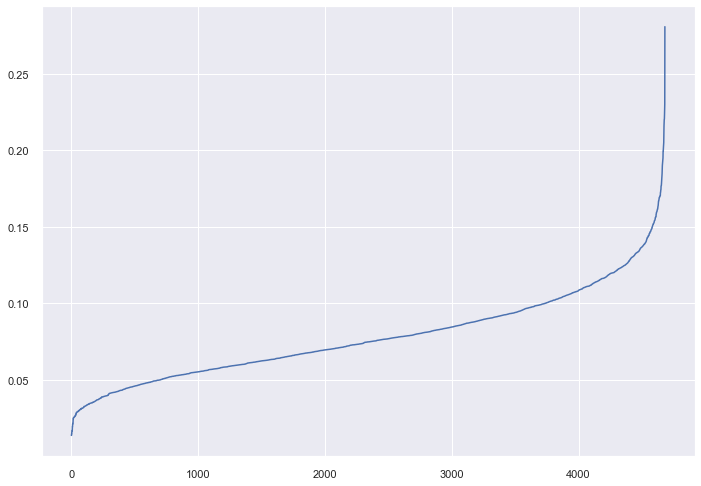

In [58]:
distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.plot(distances)

In [59]:
m = DBSCAN(eps=0.18, min_samples=5)
m.fit(X)

DBSCAN(algorithm='auto', eps=0.18, leaf_size=30, metric='euclidean',
       metric_params=None, min_samples=5, n_jobs=None, p=None)

# DBSCAN

Algoritmo per DBSCAN, parametri:
- eps = raggio di analisi
- min_samples = minimo numero di vicini di un punto per individuare il nummero di giusto di clusters, inizialmente randomico e poi vedremo metodologie per megio individuarlo

In [60]:
from scipy.spatial.distance import pdist, squareform
dist = pdist(X_minmax, 'euclidean') #pair wise distance
print (dist)
dist = squareform(dist) #distance matrix given the vector dist

[0.48939336 0.67708433 0.42159268 ... 0.74457152 0.414926   0.69375794]


In [61]:
X.head()

,valence,dominance,concreteness,aoa,semsize
0,2.864,4.333,5.455,6.760,4.652
1,5.781,4.667,5.906,5.177,5.121
2,5.250,5.235,3.286,5.543,2.667
3,3.767,4.419,3.367,6.233,4.679
4,3.880,4.800,3.292,6.407,5.083


### fixed neighbors

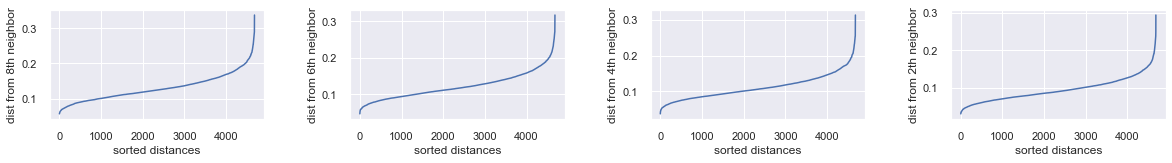

In [62]:
# Set up a grid of plots:
fig = plt.figure(figsize=(20,2))
fig_dims = (1, 4)
fig.subplots_adjust(hspace=0.4, wspace=0.4)

k = 8
    
for i in range(0,1):
    for j in range(0,4):
        plt.subplot2grid(fig_dims, (i,j))
        kth_distances = list()
        for d in dist:
            index_kth_distance = np.argsort(d)[k]
            kth_distances.append(d[index_kth_distance])
        plt.plot(range(0, len(kth_distances)), sorted(kth_distances))
        plt.ylabel('dist from %sth neighbor' % k)
        plt.xlabel('sorted distances')
        plt.tick_params(axis='both', which='major')
        plt.grid(True)
        
        k-=2

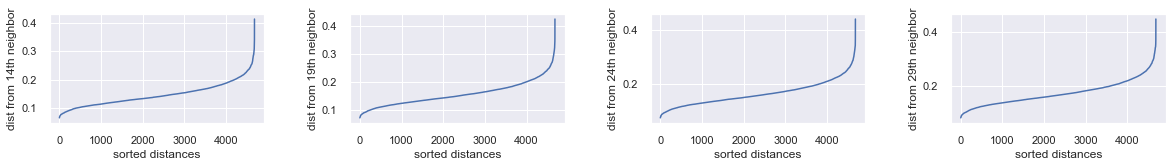

In [63]:
# Set up a grid of plots:
fig = plt.figure(figsize=(20,2))
fig_dims = (1, 4)
fig.subplots_adjust(hspace=0.4, wspace=0.4)

k = 14
    
for i in range(0,1):
    for j in range(0,4):
        plt.subplot2grid(fig_dims, (i,j))
        kth_distances = list()
        for d in dist:
            index_kth_distance = np.argsort(d)[k]
            kth_distances.append(d[index_kth_distance])
        plt.plot(range(0, len(kth_distances)), sorted(kth_distances))
        plt.ylabel('dist from %sth neighbor' % k)
        plt.xlabel('sorted distances')
        plt.tick_params(axis='both', which='major')
        plt.grid(True)
        
        k+=5

C:\Users\aliis\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


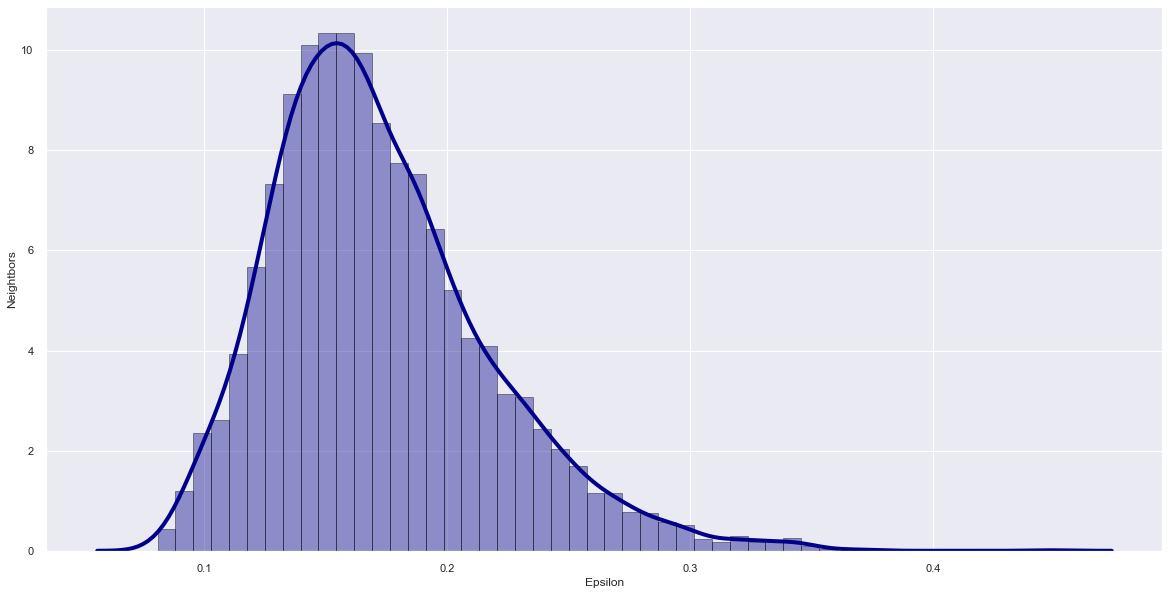

In [64]:
fig = plt.figure(figsize=(20,10))
fig_dims = (20, 20)

# Density Plot and Histogram of all arrival delays
sns.distplot(kth_distances, kde=True, 
             color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})
plt.ylabel('Neightbors')
plt.xlabel('Epsilon')
plt.tick_params(axis='both', which='major')
plt.grid(True)

In [65]:
dbscan = [] 

In [66]:
eps_values = [0.30, 0.25, 0.26, 0.22, 0.32, 0.35]
min_samples_values = 8



for i in range(len(eps_values)): 
    d = DBSCAN(eps=eps_values[i], min_samples=min_samples_values) # algorithmic parameters
    dbscan.append(d)
    dbscan[i].fit(X_minmax)

In [67]:
eps_values = [0.12, 0.30, 0.25, 0.26, 0.22, 0.32, 0.35]
min_samples_values = 14



for i in range(len(eps_values)): 
    d = DBSCAN(eps=eps_values[i], min_samples=min_samples_values) # algorithmic parameters
    dbscan.append(d)
    dbscan[i].fit(X_minmax)

In [68]:
# OUTPUT
dbscan[0].labels_
# dbscan[1].labels_

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [69]:
dbscan[0]

DBSCAN(algorithm='auto', eps=0.3, leaf_size=30, metric='euclidean',
       metric_params=None, min_samples=8, n_jobs=None, p=None)

In [70]:
len(X)

4682

In [71]:
min_samples_values = np.log(len(X))
min_samples_values

8.451480648050856

In [72]:
eps_values = 0.14 #0.12 #0.14
min_samples_values = 12 #8 #12


d = DBSCAN(eps=eps_values, min_samples=min_samples_values) # algorithmic parameters
dbscan = d
dbscan.fit(X_minmax)

DBSCAN(algorithm='auto', eps=0.14, leaf_size=30, metric='euclidean',
       metric_params=None, min_samples=12, n_jobs=None, p=None)

In [73]:
dist = pdist(X_minmax, 'euclidean')
dist

array([0.48939336, 0.67708433, 0.42159268, ..., 0.74457152, 0.414926  ,
       0.69375794])

In [74]:
S = silhouette_score(X_minmax, dbscan.labels_)
S

-0.005326805154686712

In [76]:
dbscan_complete = pd.DataFrame()

number_of_classes = []
n_noise = []
dbs_run=[]

number_of_classes.append(np.unique(dbscan.labels_).shape[0])
#n_noise.append(dbscan.labels_.values_count(-1))
n_noise.append(dbscan.labels_)


In [77]:
number_of_classes

[4]

In [78]:
cluster_1 = []
cluster_2 =[]
cluster_3 =[]
cluster_4 =[]

for i in dbscan.labels_:   
    if i == -1:
        n_noise.append(i)
    elif i == 0:
        cluster_1.append(i)
    elif i == 1:
        cluster_2.append(i)
    elif i == 2:
        cluster_3.append(i)
    else:
        cluster_4.append(i)
        

In [79]:
len(n_noise)

853

In [80]:
len(cluster_1)

3808

In [81]:
len(cluster_2)

12

In [82]:
len(cluster_3)

10

In [83]:
len(cluster_4)

0

In [85]:
dbscan_complete = pd.DataFrame()

number_of_classes = []
n_noise = []
dbs_run=[]

for i in range(eps_values): 
    number_of_classes.append(np.unique(dbscan[i].labels_).shape[0])
    n_noise.append(list(dbscan[i].labels_).count(-1))
    dbs_run.append(i+1)

TypeError: 'float' object is not iterable

In [40]:
# dbscan_complete['DBSCAN case'] = dbs_run
dbscan_complete['K'] = min_samples_values
dbscan_complete['Eps'] = eps_values
dbscan_complete['Number of clusters'] = number_of_classes

In [41]:
zero_population = []
one_population = []
two_population = []
for i in range(len(eps_values)): 
    zero_population.append(list(dbscan[i].labels_).count(0))
    one_population.append(list(dbscan[i].labels_).count(1))
    two_population.append(list(dbscan[i].labels_).count(2))

dbscan_complete['Noise label'] = -1
dbscan_complete['Noise population'] = n_noise
dbscan_complete['Population of cluster 0'] = zero_population
dbscan_complete['Population of cluster 1'] = one_population
dbscan_complete['Population of cluster 2'] = two_population

dbscan_complete

TypeError: object of type 'float' has no len()

In [42]:
X_clusters = []

In [43]:
X_clusters = dbscan[11].labels_

TypeError: 'DBSCAN' object is not subscriptable

In [45]:
X_num.drop(columns =['arousal', 'imageability','gender','frequency_log'], inplace = True)

KeyError: "['arousal' 'imageability' 'gender' 'frequency_log'] not found in axis"

TypeError: 'DBSCAN' object is not subscriptable

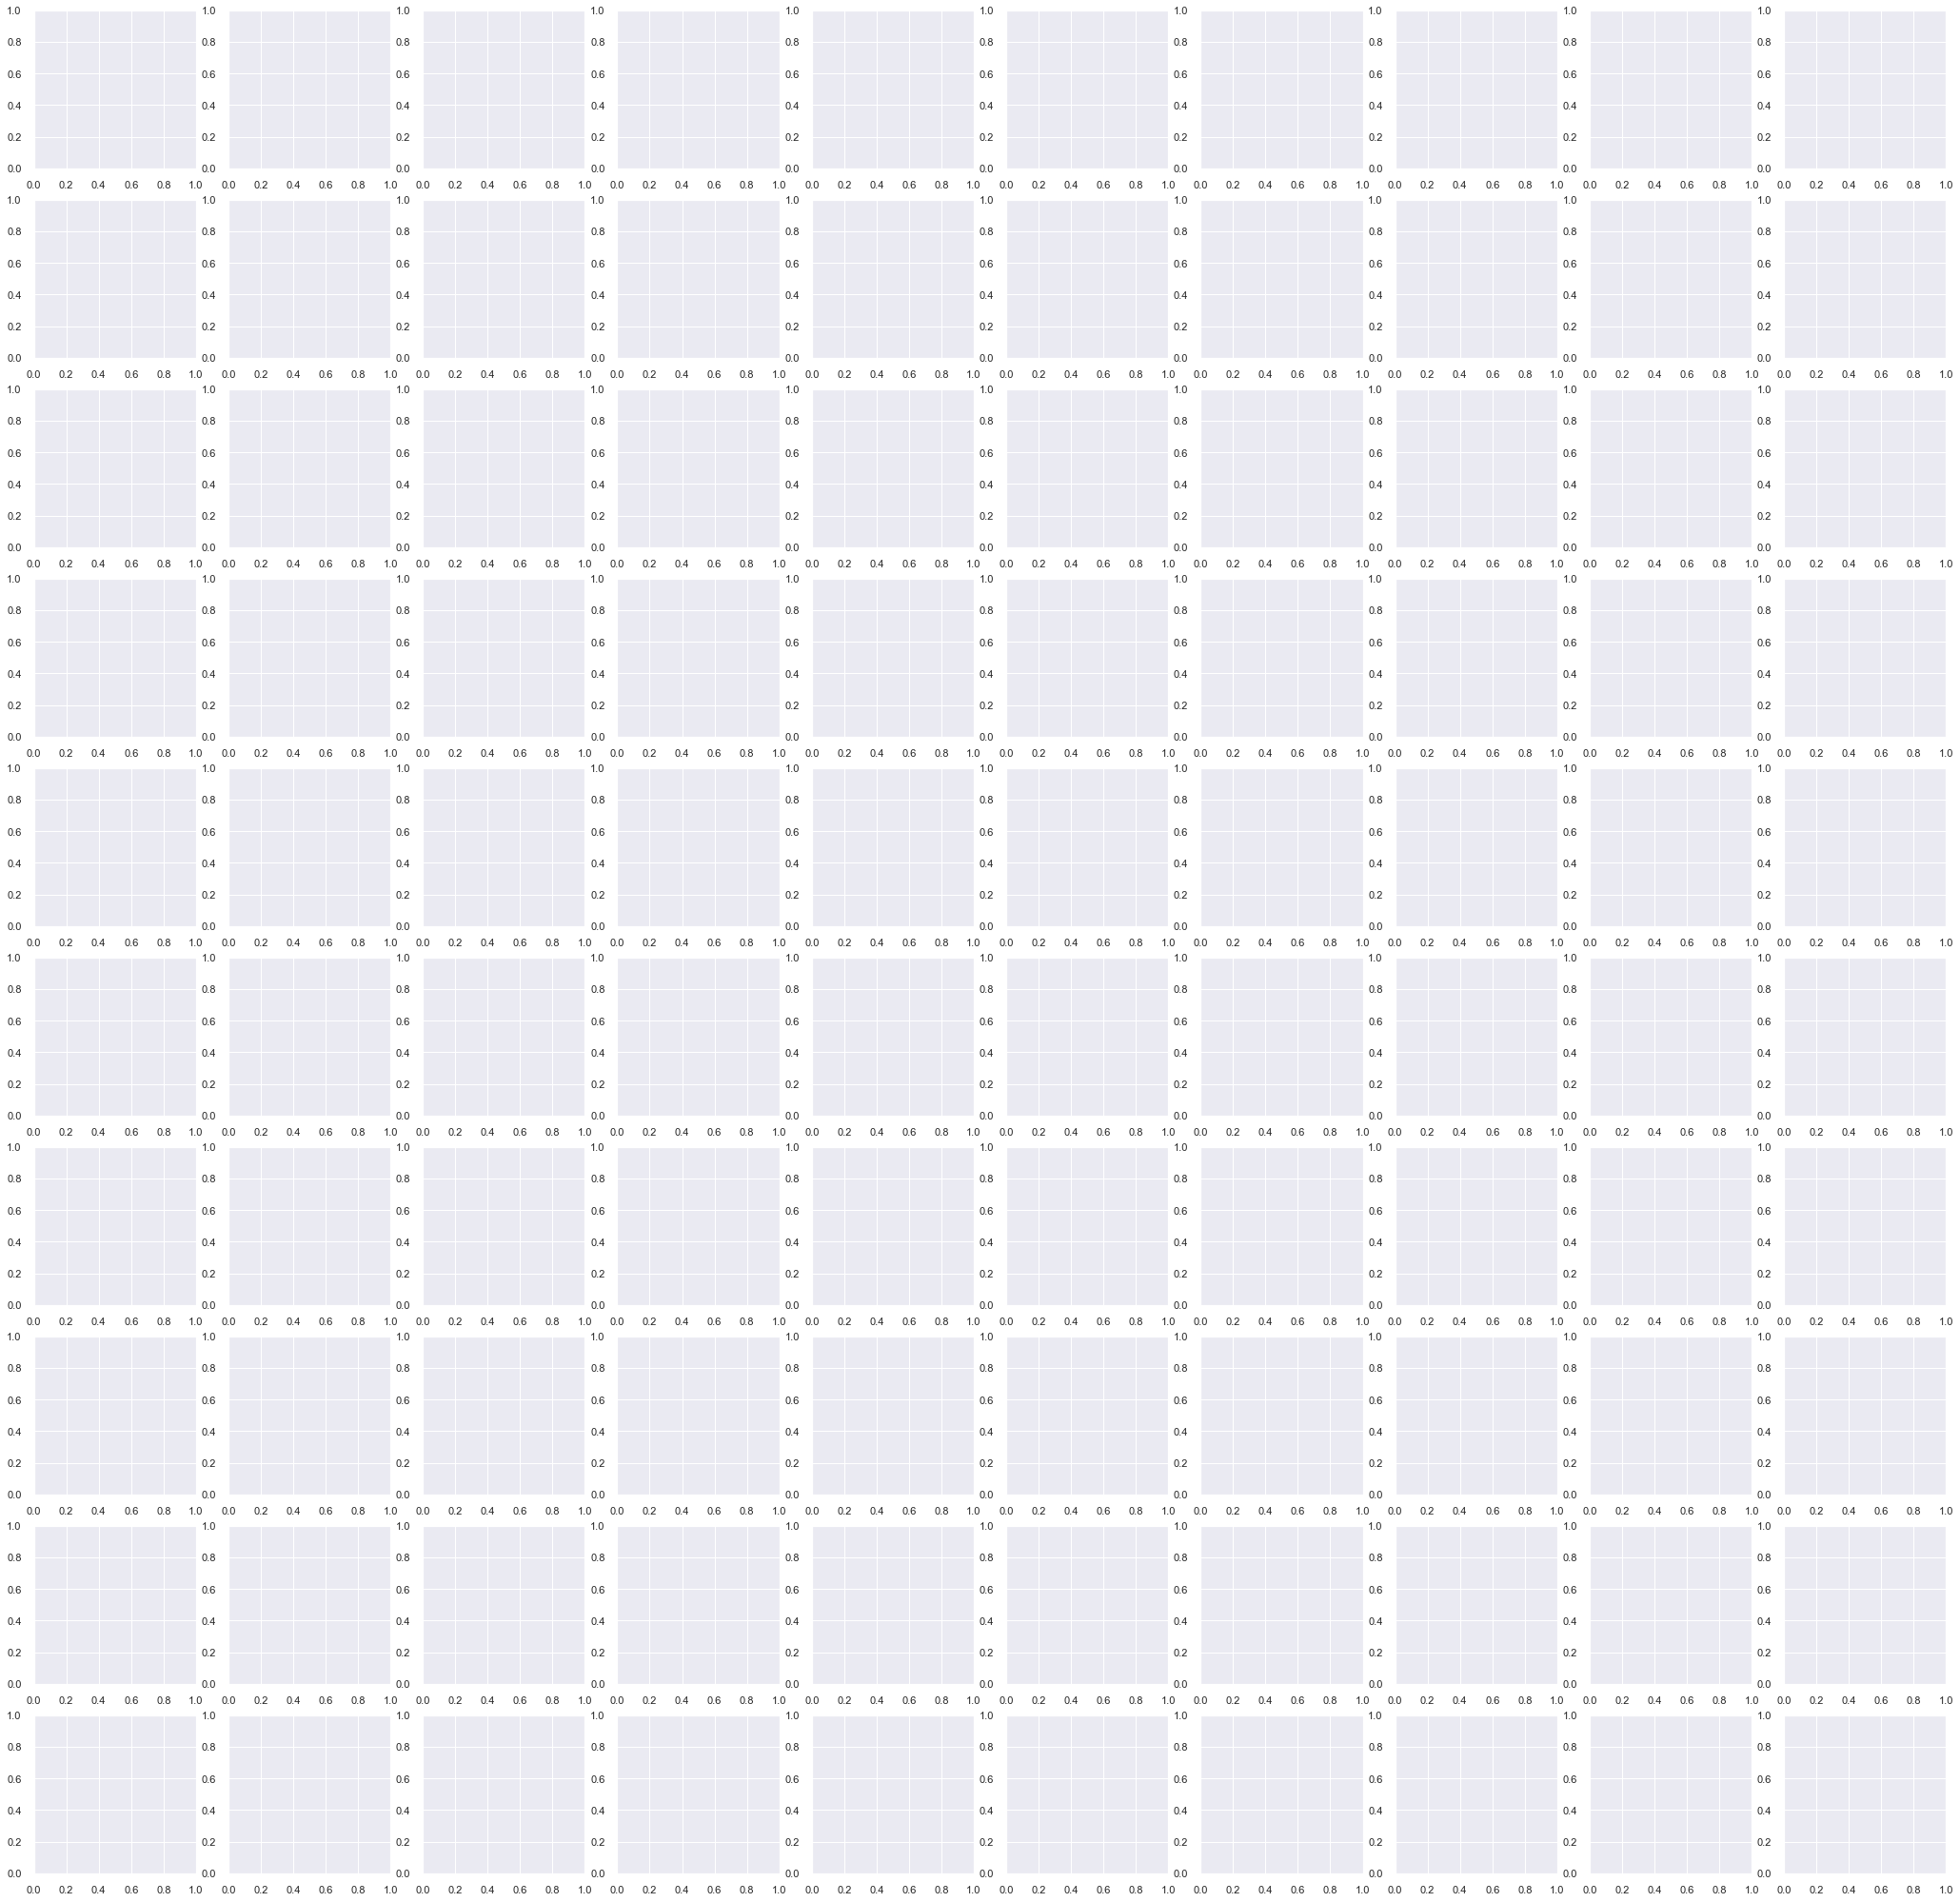

In [44]:
f, axs = plt.subplots(nrows=10, ncols=10, figsize=(36,36))
index = 0
for i in range(0,len(X_num.columns)):
    for j in range(i+1,len(X_num.columns)):
        axs[int(index/10)][index%10].scatter(X[X.columns[i]], X[X.columns[j]], c=dbscan[15].labels_, s=20, cmap=cm.Set1)
        axs[int(index/10)][index%10].set_title('Correlation of ' + X.columns[i] + ' and ' + X.columns[j], fontdict={'fontsize': 'xx-large', 'fontweight' : 'bold'})
        axs[int(index/10)][index%10].set_xlabel(X.columns[i], fontdict={'fontsize': 'xx-large', 'fontweight' : 'bold'})
        axs[int(index/10)][index%10].set_ylabel(X.columns[j], fontdict={'fontsize': 'xx-large', 'fontweight' : 'bold'})
        index = index + 1

In [101]:
neigh = NearestNeighbors(n_neighbors = 2)
nbrs = neigh.fit(X_minmax)

distances, indices = nbrs.kneighbors(X_minmax)

NameError: name 'NearestNeighbors' is not defined

In [ ]:
min_samples_values = [5,5,20,20,20,20,25,25,25,25,25,30,30,30,10,10,10,10,8,8,8,8]

In [94]:
dbscan = DBSCAN( eps=0.20, min_samples=15)
dbscan.fit(X_minmax)

DBSCAN(eps=0.2, min_samples=15)

Stessa sintassi di kmeans, con la differneza che possiamo avere valori -1: <b>noise point</b>

In [83]:
dbscan.labels_

array([-1, -1, -1, ..., -1, -1, -1], dtype=int64)

Possiamo comparare gli outliers ottenuti tramite boxplot e quelli ottenuti con DBSCAN (i noise points)
- verificare similarità tra outliers di boxplot e quelli ottenuti con DBSCAN

### Visualizzazione

Visualizzare i clsuter: risultato molto differente poiché DBSCAN è in grado di segmentare i punti che appartengono iris setosa, ma non è in grado di riconsocere il cluster più grande

L'algoritmo migliore: kmeans permette di avere una segmentazione migliore e più dettagliata poiché centorid-based. 

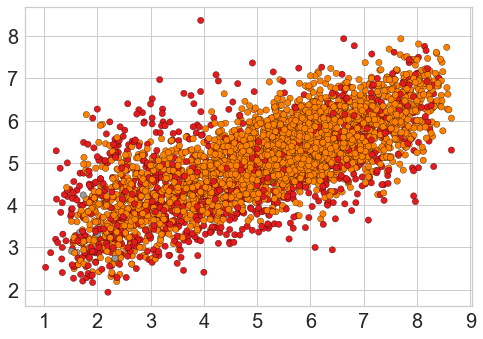

In [95]:
plt.scatter(X['valence'], X['dominance'], s=40, edgecolor='black', c= dbscan.labels_ , cmap=cm.Set1)

plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

plt.show()

In [ ]:
#studiare distribuzione dei valori categorici

### Scegliere i migliori parametri

Metodo per identificare il miglior valore del raggio e del minimum k neightbours:
- si può utilizzare la matrice di distanza con valori normalizzati e distanza euclidea fissata
- dist[0] mostra la distanza tra il primo valore e tutti gli altri

In questo metodo si vuole determinare eps secondo il min_samples


In [85]:
# inizializziao una lista e diamo un formatt 
dist = pdist(X_minmax, 'euclidean')
dist = squareform(dist)

#iteriamo per cisacun elemento nella matrice reg 1:21
k=5
kth_distances = [] # lista delle distanze dei punti
for d in dist: 
    index_kth_distance = np.argsort(d)[k]
    kth_distances.append(d[index_kth_distance])

Visualizzazione: plot molto simile a SSE per determinare eps: 
- i migliori punti sono tra 0.20 e 0.25 per non avere noise points
- in questo modo si considerano solo i punti che non sono outliers

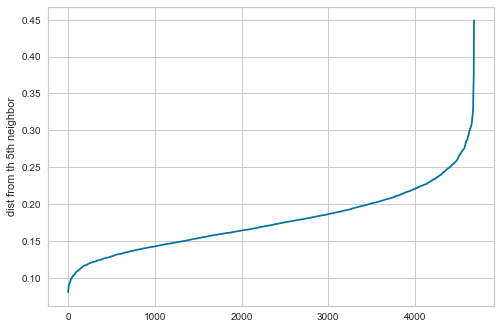

In [81]:
plt.plot(range(0, len(kth_distances)), sorted(kth_distances)) #ordiniamo le distanze
plt.ylabel('dist from th 5th neighbor')
         
plt.show()

### Note

E' noramle avere difficoltà con DBSCAN: di fatti lavora meglio con l'altro dataset (non glasgow, dove funziona meglio kmeans e clustering gerarchico)

# Clustering gerarchico

Creare una matrice di prossimità con parametri:
- valori scalati
- metric = metrica 'euclidiana'


In [ ]:
data_dist = pdist(X_minmax, metric='euclidean')

Inizializiamo un algoritmo gerarchico linkage, parametri:
- passiamo la matrice
- method = il metodo che vogliamo passare come single (gerachia composta da 2), complete, avarege


In [ ]:
data_link = linkage(data_dist, method='complete')

### Visualizzazione

Plottiamo il dendogramma con parametri:
- risultato dell'algortimo gerarchico
- truncate_mode = 'lastp' è necessrio usare il metodo truncate per selezionare ua soglia e non visualizzare tutto il dendogramma

In [ ]:
res = dendrogram(data_link, truncate_mode='lastp') # color_threshold = 0.5 per selezionare il livello

Da questo dendogramma possiamo vedere che:
- sono presenti due  differneti clusters
- quando si ha un singolo valore significa che il valore corrisponde al singolo valore nel dataset, mentre un valore come (n) significa che corrisponde a n valori 
- è utile per verificare la gerarchia globale nel dataset


In generale è buona norma  osservare differenti dendogrammi per ogni metodo  (signle, complete, avarage) e sceglierne uno. Ci permette di capire il numero di clusters

### Accedere ai labels

AgglomerativeClustering() è un metodo per accedere ai labels del cluster, alla distribuzione ecc., utile per mergiare i valori categorici e continui:
- n_clusters =  scegliere il numero di clsuters, con signle method abbiamo 2 clusters
- affinity = da inserire poiché non stiamo lavorando con una matrice di prossimità
- linkage = selezioanre il metodo signle, complete, avarage ecc.

Fit serve per runnare il metodo:
- passare distace matrix generica 



In [ ]:
hier = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='single')
hier.fit(X_minmax)

In [ ]:
#si possono ottenere le etichette
hier.labels_

E' possibile modificare il valore di affinity nel metodo AgglomerativeClustering con <b>'precomputed'</b> per poter utilizzare una matrice precomputata

In [ ]:
hier = AgglomerativeClustering(n_clusters=2, affinity='precomputed', linkage='single')
hier.fit( dist ) #passo una matrice di distanza calcolata precedentemente